In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("2013_movies.csv")

In [3]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [4]:
# 2.1 Plot domestic total gross over time.

In [5]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

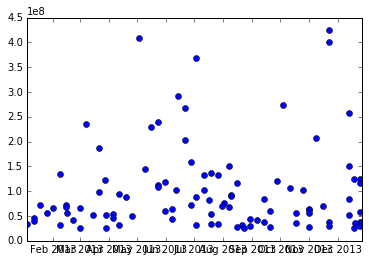

In [128]:

plt.plot(df['ReleaseDate'], df['DomesticTotalGross'], 'o')
#ax.set_xlabel('Release Date')
#ax.set_ylabel('Domestic Total Gross')



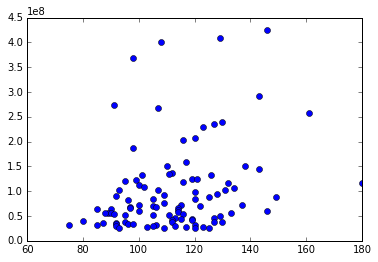

In [124]:
#2.2
plt.plot(df['Runtime'],df['DomesticTotalGross'], 'o')
ax.set_xlabel('Runtime')
ax.set_ylabel('Domestic Total Gross')

In [8]:
#2.3 Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [37]:
df_rating = df.groupby("Rating")
df_rating_mean = df_rating["DomesticTotalGross", "Runtime"].mean()
df_rating_mean

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


In [172]:
df_sort = df.sort_values("Rating")

df_G = df_sort.iloc[:1,:].reset_index()
df_PG = df_sort.iloc[1:16,:].reset_index()
df_PGth = df_sort.iloc[16:63,:].reset_index()
df_R = df_sort.iloc[63:,:].reset_index()

df_G = df_G["DomesticTotalGross"] + df_G["Runtime"]
df_PG = df_PG["DomesticTotalGross"] + df_PG["Runtime"]
df_PGth = df_PGth["DomesticTotalGross"] + df_PGth["Runtime"]
df_R = df_R["DomesticTotalGross"] + df_R["Runtime"]

df_G

0    268492871
dtype: int64

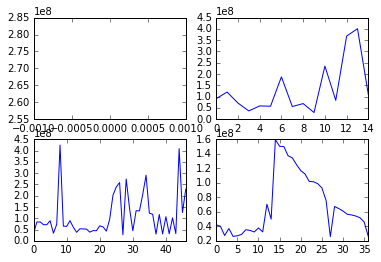

In [171]:
#2.4 Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

fig, axes = plt.subplots(nrows=2, ncols=2)

df_G.plot(ax=axes[0,0])
df_PG.plot(ax=axes[0,1])
df_PGth.plot(ax=axes[1,0])
df_R.plot(ax=axes[1,1])

In [10]:
# 2.5 What director in your dataset has the highest gross per movie?
director_df = df.groupby('Director')
director_df.mean().sort_values("DomesticTotalGross", ascending=False).head(1)

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.0,424668047.0,146.0


In [30]:

#2.6 Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

#Title of graph should include: Mean Domestic Total Gross by Month in 2013

#Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

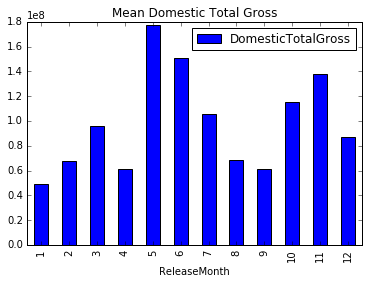

In [13]:
df['ReleaseMonth'] = df['ReleaseDate'].map(lambda x: x.month)
df_month = df.groupby(df['ReleaseMonth']).mean().reset_index()
df_month.plot.bar(x='ReleaseMonth', y='DomesticTotalGross', title="Mean Domestic Total Gross")